In [1]:
from google.colab import drive
try:
  drive.mount('/content/drive', force_remount=False)
except:
  pass

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/AI_for_Health

/content/drive/MyDrive/AI_for_Health


In [3]:
data_path = "mimic-iii-clinical-database-1.4"

# Install packages

In [ ]:
! pip install -U pip setuptools wheel
! pip install -U spacy
! python -m spacy download en_core_web_sm

In [ ]:
! python -m spacy download en_core_web_sm

# Run once, then restart session and continue running

In [4]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.3/en_ner_bc5cdr_md-0.5.3.tar.gz

import spacy
nlp_sci = spacy.load("en_ner_bc5cdr_md")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.4/917.4 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.4 MB/s eta 0:00:00
  Created wheel for en_ner_bc5cdr_md: filename=en_ner_bc5cdr_md-0.5.3-py3-none-any.whl size=119790307 sha256=8ce8fbc4bb5e70c887efe3d432a162c77563b1339e7f674cac72430ceeeaf838
  Stored in directory: /root/.cache/pip/wheels/9a/c3/6a/4ecc42ebb9ad3cf9068dc00a7c9eac9d5d0d03c73d103e6aa7
Successfully built en_ner_bc5cdr_md
  Attempting uninstall: typer
    Found existing installation: typer 0.15.1
    Uninstalling typer-0.15.1:
      Successfully uninstalled typer-0.15.1
  Attempting unin

/usr/local/lib/python3.11/dist-packages/spacy/language.py:2141: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


In [5]:
!pip install scispacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.2/920.2 kB 38.2 MB/s eta 0:00:00
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.12
    Uninstalling thinc-8.1.12:
      Successfully uninstalled thinc-8.1.12
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-ner-bc5cdr-md 0.5.3 requires spacy<3.7.0,>=3.6.1,

# Import packages

In [4]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 29.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import spacy
from spacy import displacy
import scispacy
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import torch
from transformers import AutoTokenizer, AutoModel

# Load full data and filter for diagnoses

In [9]:
# Load data
noteevents = pd.read_csv(os.path.join(data_path,'NOTEEVENTS.csv.gz'), compression="gzip", usecols=["SUBJECT_ID", "HADM_ID", "CATEGORY", "TEXT"])
diagnoses = pd.read_csv(os.path.join(data_path,'DIAGNOSES_ICD.csv.gz'), compression="gzip", usecols=["SUBJECT_ID", "HADM_ID", "ICD9_CODE"])

In [13]:
# Filtering for diagnosis: Asthma
fil_diagnoses = diagnoses[diagnoses['ICD9_CODE'].isin(['49390','49391','49392'])]

# Filter for Discharge summary
fil_noteevents = noteevents[noteevents['CATEGORY'] == 'Discharge summary']

# Merge data
discharge_summaries = pd.merge(fil_diagnoses, fil_noteevents, on=['SUBJECT_ID', 'HADM_ID'])

In [ ]:
print(len(fil_diagnoses))
print(len(fil_noteevents))
print(len(discharge_summaries))

In [15]:
# Save filtered discharge summaries
discharge_summaries.to_csv("asthma_discharge_summaries.csv", index=False)

# Load filtered data hereafter

In [6]:
discharge_summaries = pd.read_csv("asthma_discharge_summaries.csv")
discharge_summaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SUBJECT_ID  2533 non-null   int64 
 1   HADM_ID     2533 non-null   int64 
 2   ICD9_CODE   2533 non-null   int64 
 3   CATEGORY    2533 non-null   object
 4   TEXT        2533 non-null   object
dtypes: int64(3), object(2)
memory usage: 99.1+ KB


# Spacy and SciSpacy NLP models

## 1) Model definition

In [12]:
# Load Spacy model
nlp = spacy.load('en_core_web_sm')

# Load SciSpacy model
nlp_sci = spacy.load("en_ner_bc5cdr_md")

/usr/local/lib/python3.11/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.5.3) was trained with spaCy v3.6.1 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
/usr/local/lib/python3.11/dist-packages/spacy/language.py:2195: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


## 2) Entity visualization with Displacy

In [8]:
# Visualize entities using Displacy (Spacy model)
sample_text = discharge_summaries["TEXT"].iloc[0]
doc_spacy = nlp(sample_text)
displacy.render(doc_spacy, style="ent", jupyter=True)

In [9]:
# Visualize entities using Displacy (SciSpacy model)
doc_sci = nlp_sci(sample_text)
displacy.render(doc_sci, style="ent", jupyter=True)

## 3) Entity extraction and vector representation using Word2Vec

In [14]:
EXCLUDE_LABELS = {"DATE", "TIME", "MONEY"} #"PERCENT", "QUANTITY", "ORDINAL", "CARDINAL"

def extract_entities(text, nlp, exclude_labels=None):
    """Extract and filter named entities while keeping tokenization and lemmatization."""
    doc = nlp(text)
    return [ent.lemma_ for ent in doc.ents if ent.label_ not in (exclude_labels or set())]

def build_corpus(df, nlp, exclude_labels=None):
    """Build a corpus of entity lists from discharge summaries."""
    return [extract_entities(row["TEXT"], nlp, exclude_labels) for _, row in df.iterrows()]

In [11]:
# Build entity corpora (Spacy model)
corpus_spacy = build_corpus(discharge_summaries, nlp, EXCLUDE_LABELS)

In [12]:
# Build entity corpora (SciSpacy model)
corpus_sci = build_corpus(discharge_summaries, nlp_sci, EXCLUDE_LABELS)

In [ ]:
print(corpus_sci)

## 4) Preprocess text (tokenize, lemmatize and clean text)

In [14]:
def preprocess_text(text_list, nlp):
    """Tokenize, lemmatize, and clean entity lists."""
    processed_corpus = []
    for text in text_list:
        doc = nlp(text)  # Tokenization & lemmatization
        tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
        processed_corpus.append(list(dict.fromkeys(tokens)))
    return processed_corpus

In [15]:
# Preprocess entity corpus (Spacy)
cleaned_corpus_spacy = preprocess_text([" ".join(entities) for entities in corpus_spacy], nlp)

In [16]:
# Preprocess entity corpus (SciSpacy)
cleaned_corpus_sci = preprocess_text([" ".join(entities) for entities in corpus_sci], nlp_sci)

## 5) Word2Vec

In [18]:
# Train Word2Vec model (Spacy)
model_spacy = Word2Vec(cleaned_corpus_spacy, vector_size=100, window=5, min_count=2, workers=4)

In [20]:
# Train Word2Vec model (SciSpacy)
model_sci = Word2Vec(cleaned_corpus_sci, vector_size=100, window=5, min_count=2, workers=4)

In [ ]:
print("Spacy model")
print("Number of entities = ",len(list(model_spacy.wv.key_to_index)))
print(model_spacy.wv.index_to_key)

In [26]:
print("SciSpacy model")
print("Number of entities = ",len(list(model_sci.wv.key_to_index)))
print(model_sci.wv.index_to_key)

SciSpacy model
Number of entities =  4790
['pain', 'edema', 'albuterol', 'fever', 'sodium', 'chest', 'disease', 'aspirin', 'breath', 'shortness', 'hypertension', 'infection', 'nausea', 'cough', 'allergy', 'chill', 'docusate', 'alcohol', 'pcp', 'nad', 'heparin', 'pneumonia', 'abdominal', 'constipation', 'sulfate', 'effusion', 'pulmonary', 'tenderness', 'etoh', 'metoprolol', 'leave', 'lasix', 'failure', 'diarrhea', 'pleural', 'bleed', 'cancer', 'anemia', 'hcl', 'mitral', 'creatinine', 'lisinopril', 'stenosis', 'headache', 'regurgitation', 'atelectasis', 'oxygen', 'cyanosis', 'vancomycin', 'tartrate', 'potassium', 'wheeze', 'atrial', 'artery', 'calcium', 'pantoprazole', 'furosemide', 'respiratory', 'prednisone', 'dyspnea', 'vitamin', 'fluticasone', 'steroid', 'qhs', 'hypotension', 'tachycardia', 'qid', 'rash', 'penicillin', 'ventricular', 'loss', 'tylenol', 'hemorrhage', 'htn', 'heart', 'renal', 'gerd', 'erythema', 'pneumothorax', 'acetaminophen', 'anxiety', 'morphine', 'chronic', 'levofl

In [32]:
def print_most_similar(model, model_name, entity):
    """Print most similar entities for a given entity."""
    print("Most similar to '" + entity + "' in " + model_name)
    for e in model.wv.most_similar(entity):
        print(e)

In [33]:
print_most_similar(model_spacy, "Spacy", "asthma")
print("\n")
print_most_similar(model_sci, "SciSpacy", "asthma")

Most similar to 'asthma' in Spacy
('MVR', 0.975984513759613)
('Mild', 0.9689069390296936)
('multifocal', 0.9665277004241943)
('acute', 0.9613505601882935)
('cath', 0.9603819847106934)
('H', 0.958186149597168)
('Grade', 0.9578188061714172)
('Swan', 0.9570724368095398)
('SUMMARY', 0.9569116234779358)
('Thoracic', 0.9564297199249268)


Most similar to 'asthma' in SciSpacy
('bronchitis', 0.9848417043685913)
('sarcoidosis', 0.9761263728141785)
('lbp', 0.9743633270263672)
('leg', 0.9712156057357788)
('tuberculosis', 0.9705542325973511)
('radiculopathy', 0.9671655297279358)
('sob', 0.9660320281982422)
('ulcerative', 0.9641002416610718)
('diplopia', 0.9623757004737854)
('bladder', 0.9617841839790344)


In [34]:
print_most_similar(model_spacy, "Spacy", "pain")
print("\n")
print_most_similar(model_sci, "SciSpacy", "pain")

Most similar to 'pain' in Spacy
('LUQ', 0.9779062867164612)
('CMV', 0.9752193093299866)
('initial', 0.9739500284194946)
('LUL', 0.9718632102012634)
('nl', 0.9714214205741882)
('Guaiac', 0.9683716893196106)
('hit', 0.9678241610527039)
('PEG', 0.9676622748374939)
('appearance', 0.967494547367096)
('T', 0.9655733704566956)


Most similar to 'pain' in SciSpacy
('diaphoresis', 0.9784718751907349)
('dizziness', 0.962019145488739)
('lightheadedness', 0.9597553014755249)
('chest', 0.9565642476081848)
('palpitation', 0.9498943090438843)
('tightness', 0.9484239816665649)
('substernal', 0.9438645243644714)
('exertional', 0.9343558549880981)
('fatigue', 0.9342600703239441)
('nausea', 0.9327846169471741)


In [36]:
print_most_similar(model_spacy, "Spacy", "hypertension")
print("\n")
print_most_similar(model_sci, "SciSpacy", "hypertension")

Most similar to 'hypertension' in Spacy
('cvid', 0.9946807026863098)
('Temp', 0.9945757389068604)
('xrt', 0.994575023651123)
('Bacteremia', 0.9928660988807678)
('PMV', 0.9921730756759644)
('Tues', 0.9908756613731384)
('Normocytic', 0.9908563494682312)
('vision', 0.9903990030288696)
('Risperdal', 0.9896523356437683)
('Bladder', 0.989650309085846)


Most similar to 'hypertension' in SciSpacy
('dyslipidemia', 0.9612486958503723)
('hypercholesterolemia', 0.9579713940620422)
('hyperlipidemia', 0.9423053860664368)
('angina', 0.9318641424179077)
('mibi', 0.9297360777854919)
('cad', 0.923953115940094)
('rheumatic', 0.9161355495452881)
('gout', 0.9112669229507446)
('stemi', 0.9098781943321228)
('cardiomyopathy', 0.9073893427848816)


In [42]:
# print_most_similar(model_spacy, "Spacy", "breath")
# print("\n")
print_most_similar(model_sci, "SciSpacy", "breath")

Most similar to 'breath' in SciSpacy
('tightness', 0.7959636449813843)
('chest', 0.7953360676765442)
('Ulcer', 0.7883220911026001)
('pleuritic', 0.7639626860618591)
('palpitation', 0.7582740783691406)
('wheezing', 0.752925455570221)
('aslo', 0.7521151900291443)
('Cefprozil', 0.742700457572937)
('diaphoresis', 0.742324709892273)
('pain', 0.7372404336929321)


In [43]:
# print_most_similar(model_spacy, "Spacy", "shortness")
# print("\n")
print_most_similar(model_sci, "SciSpacy", "shortness")

Most similar to 'shortness' in SciSpacy
('faint', 0.837260365486145)
('chest', 0.8123847246170044)
('Cefprozil', 0.7804356813430786)
('tightness', 0.7786343097686768)
('diaphoresis', 0.7765020728111267)
('wheezing', 0.7693924307823181)
('pain', 0.7634127140045166)
('dyspnea', 0.7495793104171753)
('lmca', 0.7441428303718567)
('cough', 0.7377268075942993)


In [41]:
print_most_similar(model_spacy, "Spacy", "ICU")
# print("\n")
# print_most_similar(model_sci, "SciSpacy", "ICU")

Most similar to 'ICU' in Spacy
('Patient', 0.9470121264457703)
('IVF', 0.9369880557060242)
('gi', 0.93473881483078)
('PRBC', 0.9292767643928528)
('SBP', 0.9269461035728455)
('IV', 0.924173891544342)
('PE', 0.920693576335907)
('ED', 0.9188439249992371)
('NPO', 0.916888415813446)
('MICU', 0.910751223564148)


Most similar to 'ICU' in SciSpacy


KeyError: "Key 'ICU' not present in vocabulary"

## 6) t-SNE plot

In [40]:
def tsne_plot(model, sample_size=50):
    """Plot t-SNE visualization for Word2Vec embeddings."""
    words = model.wv.index_to_key
    if len(words) < sample_size:
        sample_size = len(words)  # Avoid out-of-bounds error
    selected_words = np.random.choice(words, sample_size, replace=False)

    tokens = np.array([model.wv[word] for word in selected_words])

    tsne_model = TSNE(perplexity=11, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x, y = zip(*new_values)
    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(selected_words[i], xy=(x[i], y[i]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom')
    plt.show()

In [ ]:
# Plot t-SNE for Spacy model
tsne_plot(model_spacy, sample_size=200)

In [ ]:
# Plot t-SNE for SciSpacy model
tsne_plot(model_sci, sample_size=200)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


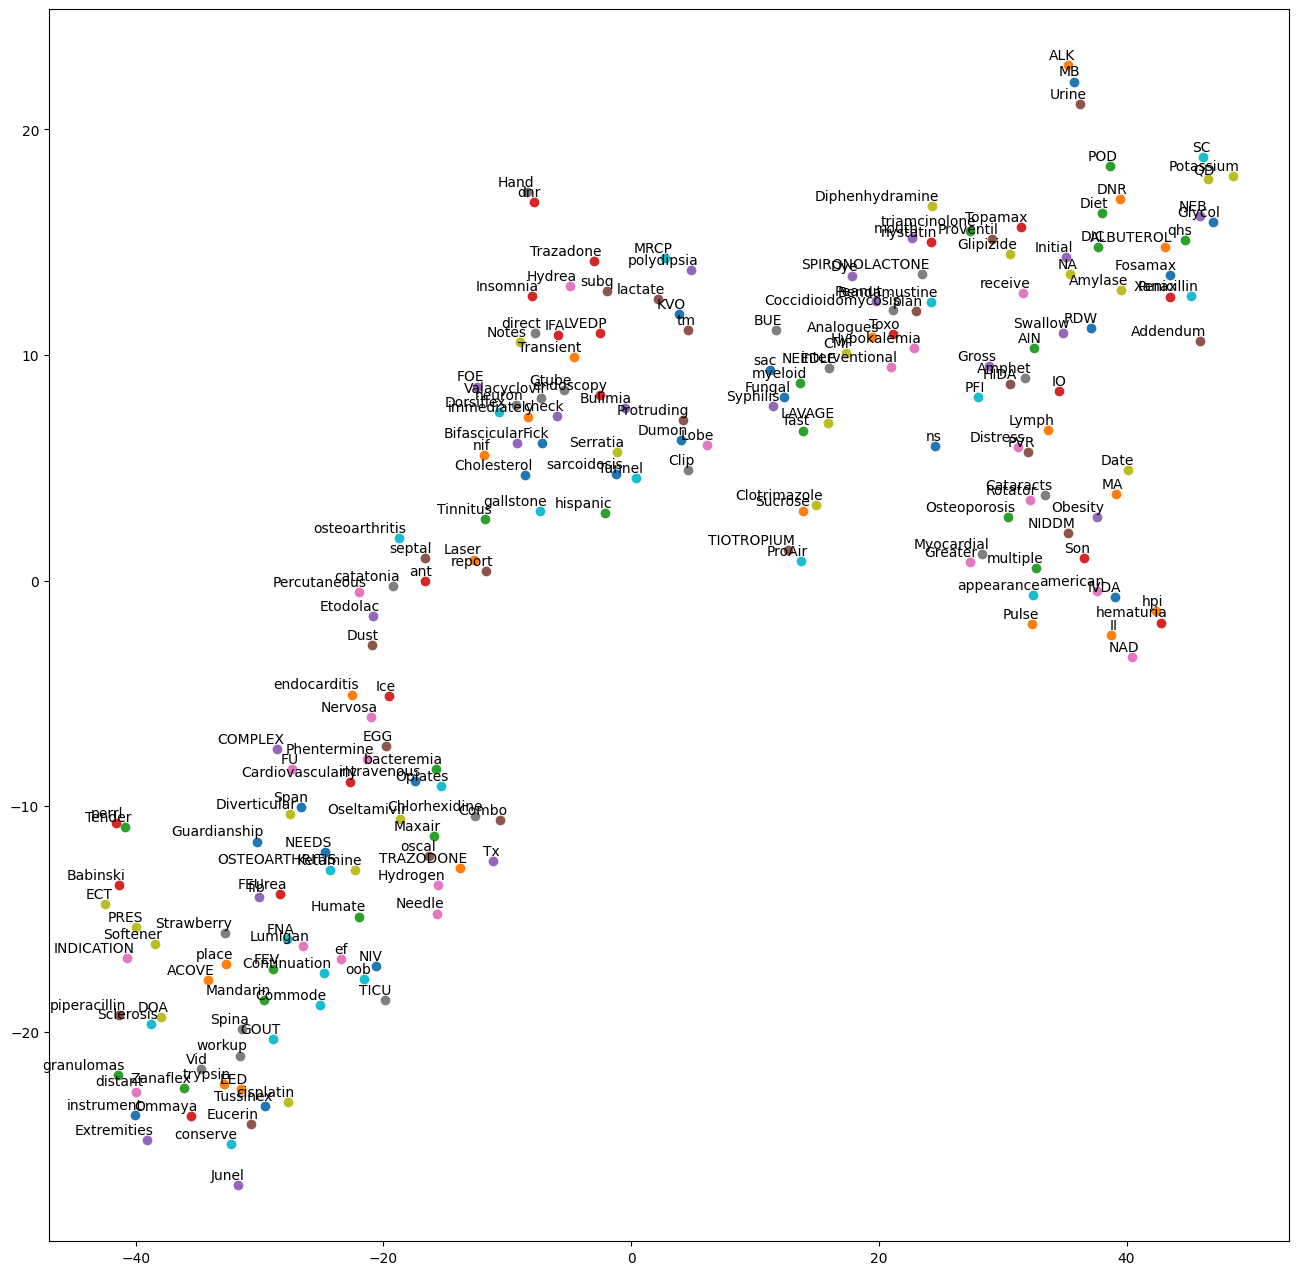

In [41]:
# Plot t-SNE for Spacy model
tsne_plot(model_spacy, sample_size=200)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


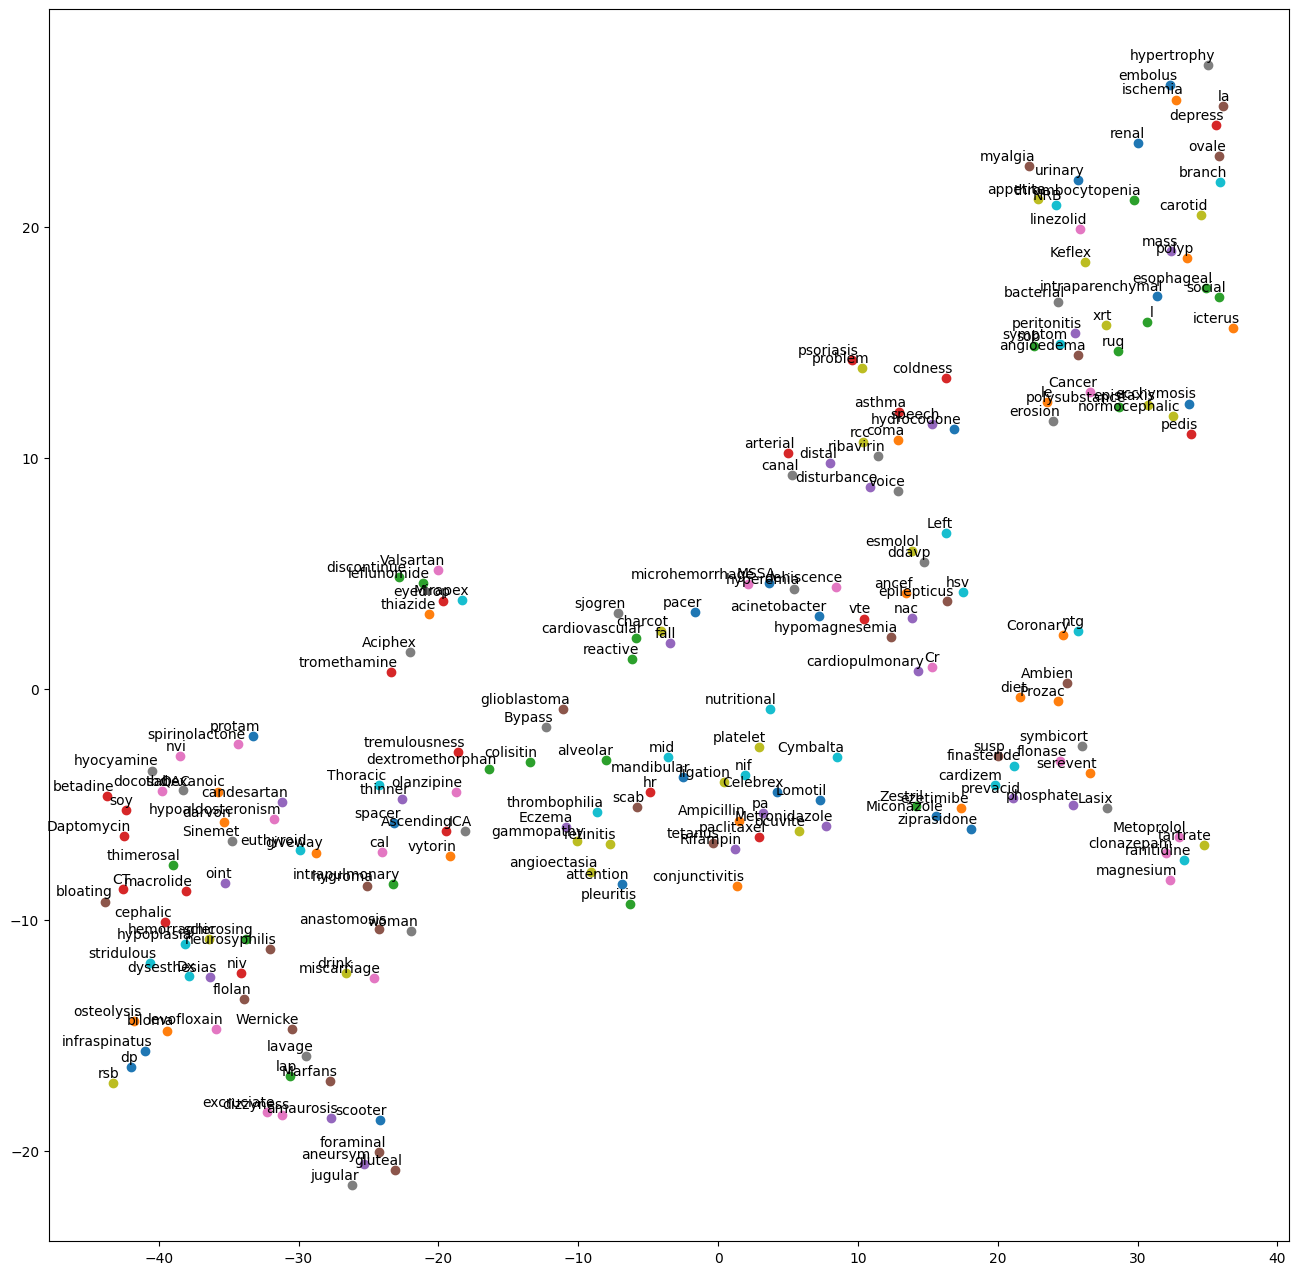

In [42]:
# Plot t-SNE for SciSpacy model
tsne_plot(model_sci, sample_size=200)